In [1]:
# ================================================================
# 1. Import Library
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import joblib

In [2]:
# ================================================================
# 2. Load Dataset
# ================================================================
df = pd.read_csv("credit_card_default.csv")
print("--- Info Dataset ---")
print(df.info())
print("\n--- 5 Data Teratas ---")
print(df.head())


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30000 non-null  int64  
 1   limit_bal                   30000 non-null  int64  
 2   sex                         29850 non-null  object 
 3   education                   29850 non-null  object 
 4   marriage                    29850 non-null  object 
 5   age                         29850 non-null  float64
 6   payment_status_sep          30000 non-null  object 
 7   payment_status_aug          30000 non-null  object 
 8   payment_status_jul          30000 non-null  object 
 9   payment_status_jun          30000 non-null  object 
 10  payment_status_may          30000 non-null  object 
 11  payment_status_apr          30000 non-null  object 
 12  bill_statement_sep          30000 non-null  int64  
 13  bill_state


--- Cek Missing Value ---
Unnamed: 0                      0
limit_bal                       0
sex                           150
education                     150
marriage                      150
age                           150
payment_status_sep              0
payment_status_aug              0
payment_status_jul              0
payment_status_jun              0
payment_status_may              0
payment_status_apr              0
bill_statement_sep              0
bill_statement_aug              0
bill_statement_jul              0
bill_statement_jun              0
bill_statement_may              0
bill_statement_apr              0
previous_payment_sep            0
previous_payment_aug            0
previous_payment_jul            0
previous_payment_jun            0
previous_payment_may            0
previous_payment_apr            0
default_payment_next_month      0
dtype: int64

Distribusi Target:
default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


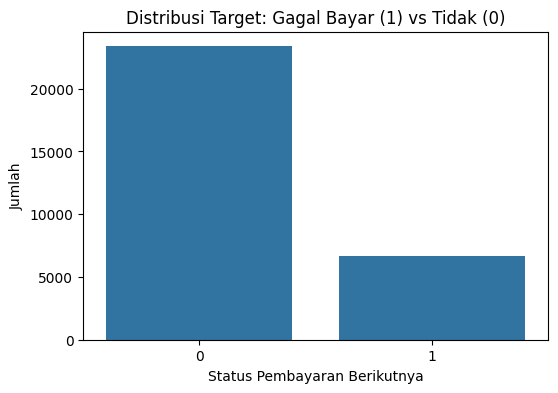

In [9]:
# ================================================================
# 3. Quick Exploratory Data Analysis (EDA)
# ================================================================
print("\n--- Cek Missing Value ---")
print(df.isna().sum())

target_col = 'default_payment_next_month'
print("\nDistribusi Target:")
print(df[target_col].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Distribusi Target: Gagal Bayar (1) vs Tidak (0)')
plt.xlabel('Status Pembayaran Berikutnya')
plt.ylabel('Jumlah')
plt.show()

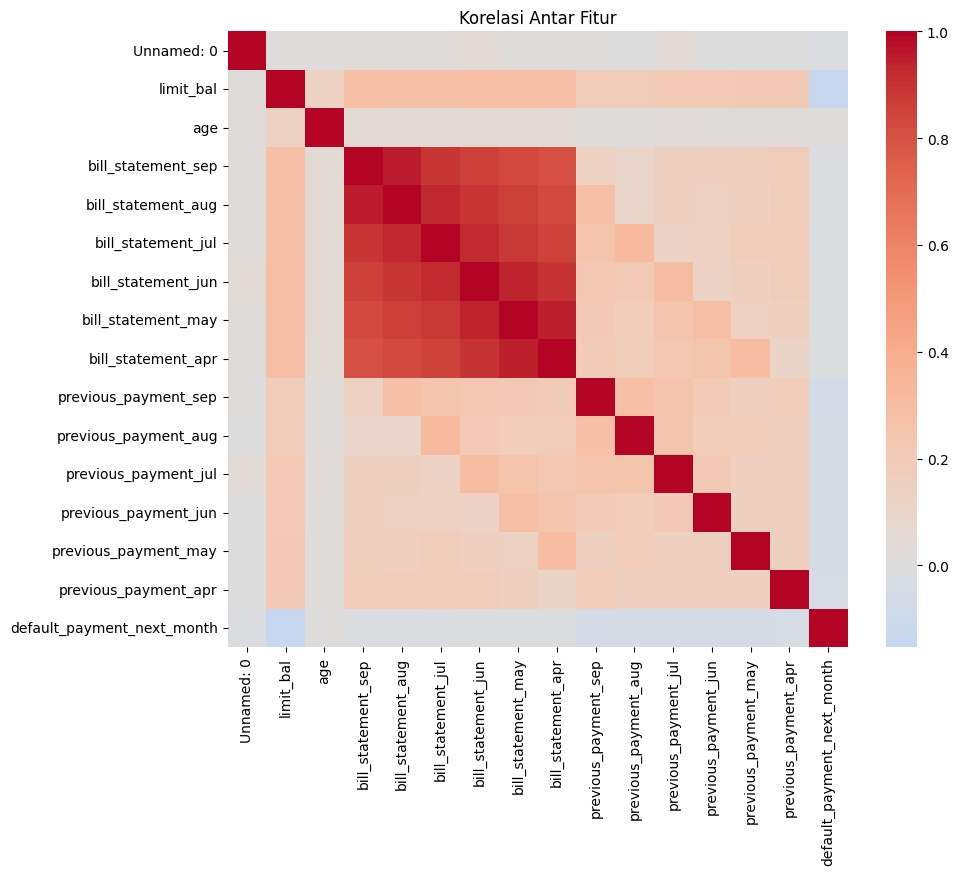

In [10]:
# ================================================================
# 4. Feature Correlation (Optional)
# ================================================================
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Korelasi Antar Fitur")
plt.show()

In [14]:
print("\nKolom kategorikal:")
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

# Konversi manual jika diketahui kolom kategorikal
if 'SEX' in df.columns:
    df['SEX'] = df['SEX'].replace({'Male': 1, 'Female': 2})
if 'EDUCATION' in df.columns:
    df['EDUCATION'] = df['EDUCATION'].replace({
        'Graduate': 1, 'University': 2, 'High School': 3, 'Others': 4
    })
if 'MARRIAGE' in df.columns:
    df['MARRIAGE'] = df['MARRIAGE'].replace({
        'Married': 1, 'Single': 2, 'Other': 3
    })

# Atau gunakan LabelEncoder otomatis:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print("\nTipe data setelah encoding:")
print(df.dtypes)



Kolom kategorikal:
Index([], dtype='object')

Tipe data setelah encoding:
Unnamed: 0                      int64
limit_bal                       int64
sex                             int64
education                       int64
marriage                        int64
age                           float64
payment_status_sep              int64
payment_status_aug              int64
payment_status_jul              int64
payment_status_jun              int64
payment_status_may              int64
payment_status_apr              int64
bill_statement_sep              int64
bill_statement_aug              int64
bill_statement_jul              int64
bill_statement_jun              int64
bill_statement_may              int64
bill_statement_apr              int64
previous_payment_sep            int64
previous_payment_aug            int64
previous_payment_jul            int64
previous_payment_jun            int64
previous_payment_may            int64
previous_payment_apr            int64
default_payme

In [32]:
# ================================================================
# FIX: Tangani NaN khusus pada kolom 'age'
# ================================================================
print("Jumlah NaN di kolom age sebelum diperbaiki:", df['age'].isna().sum())

# Isi nilai kosong dengan median umur
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # ubah ke numerik, jika ada string aneh
df['age'] = df['age'].fillna(df['age'].median())

print("Jumlah NaN di kolom age setelah diperbaiki:", df['age'].isna().sum())


Jumlah NaN di kolom age sebelum diperbaiki: 0
Jumlah NaN di kolom age setelah diperbaiki: 0


In [33]:
# ================================================================
# 5. Preprocessing Data
# ================================================================
# Hilangkan kolom ID jika ada
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
# ================================================================
# 6. Modeling Logistic Regression
# ================================================================
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Prediksi
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4673
           1       0.50      0.06      0.11      1327

    accuracy                           0.78      6000
   macro avg       0.64      0.52      0.49      6000
weighted avg       0.72      0.78      0.70      6000



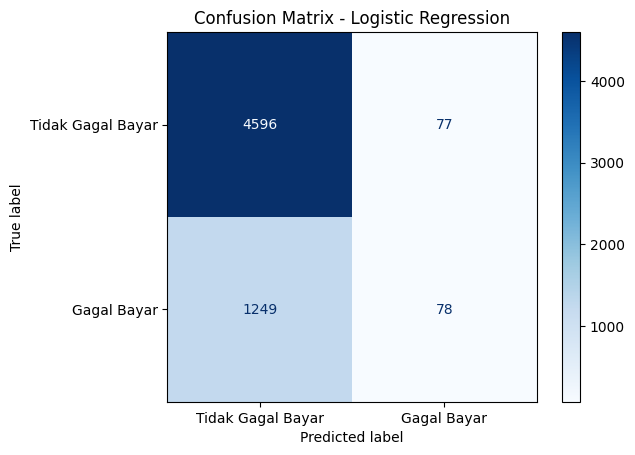


Nilai AUC: 0.7110


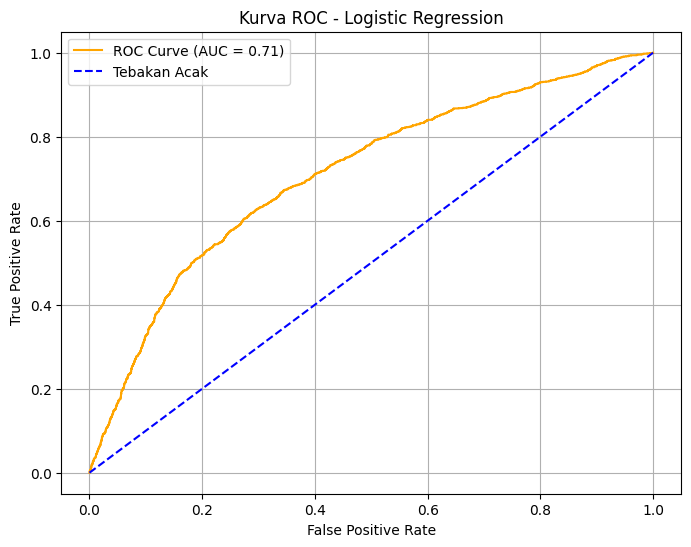

In [35]:
# ================================================================
# 7. Evaluasi Model
# ================================================================
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Gagal Bayar", "Gagal Bayar"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nNilai AUC: {auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'--', color='blue', label='Tebakan Acak')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kurva ROC - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# ================================================================
# 8. Simpan Model dan Scaler
# ================================================================
joblib.dump(log_reg, "logreg_credit_model.pkl")
joblib.dump(scaler, "scaler_credit.pkl")

print("\nModel dan Scaler berhasil disimpan!")


Model dan Scaler berhasil disimpan!
